# shAI Training 2022 | Level 1


## Task#8 (MNIST Project)

### Classification

- Before you start make sure you have latest Jupyter notebook version 
- <font color= red> If you have older version fetching the data might be different  </font>  


## Get tha dataset

In [ ]:
from sklearn.datasets import fetch_openml

In [ ]:
# CODE HERE 
# IF you got stuck use GOOGLE 
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

### exploring and preparing the dataset

#### print your dataset to get insight

In [ ]:
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixe

#### Split you data into data and labels (target)

In [ ]:
# CODE HERE


#### find the data shape using .shape function

In [ ]:
# CODE HERE
X, y = mnist["data"], mnist["target"]

### Peek at one digit from the dataset

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

***NOTE: ALL THE COMMANDS FOR PLOTTING A FIGURE SHOULD ALL GO IN THE SAME CELL. SEPARATING THEM OUT INTO MULTIPLE CELLS MAY CAUSE NOTHING TO SHOW UP.***

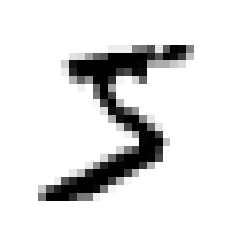

In [ ]:
# CODE HERE 
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

plt.show()

#### Split the data into train and test set

In [ ]:
import numpy as np 

In [ ]:
# CODE HERE 
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

### Shuffling the training set

In [ ]:
#hint shuffle-vs-permutation-numpy
# CODE HERE



#### access the label of the above digit image 

In [ ]:
# CODE HERE
y[200]

1

### Training a <font color= red>Binary</font> classifier 


#### Create the target vectors for this classification task
***NOTE : you can try different number.***

In [ ]:
# CODE HERE
# If you got stuck use GOOGLE
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

### SGD classifier

#### Create a SGD classifier 

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
# CODE HERE
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

#### use SGD classifier  to detect images of the number 5 

In [ ]:
# CODE HERE
sgd_clf.predict([some_digit])

array([ True])

## Performance measure 

####  Measuring Accuracy Using <font color= blue>Cross-validation</font>

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# CODE HERE
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

#### Try a dumb classifier

In [ ]:
# CODE HERE
from sklearn.dummy import DummyClassifier
clf_dummy = DummyClassifier(random_state=42) 
clf_dummy.fit(X_train, y_train_5)

DummyClassifier(random_state=42)

#### find cross_val_score for the dumb classifier

In [ ]:
#CODE HERE
cross_val_score(clf_dummy, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.90965, 0.90965, 0.90965])

## Confusion matrix

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

#### try to find confusion matrix 

In [ ]:
# CODE HERE
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

####  try perfect classifier which will have only true positives and true negative


In [ ]:
# CODE HERE
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

## Precision and Recall

In [ ]:
from sklearn.metrics import precision_score, recall_score,f1_score

***Note that precision and recall score might be different from one to anothor***

#### find precision score

In [ ]:
# CODE HERE
precision_score(y_train_5, y_train_pred)

0.8370879772350012

#### find recall score

In [ ]:
# CODE HERE
cm = confusion_matrix(y_train_5, y_train_pred)
cm[1, 1] / (cm[0, 1] + cm[1, 1])

0.8370879772350012

#### find f1 score 
***Notice that f1 score is harmonic mean between recall and precision***

In [ ]:
# CODE HERE
recall_score(y_train_5, y_train_pred)

0.6511713705958311

# Precision/Recall Tradeof

#### try to use decision_function() and make prediction

In [ ]:
# CODE HERE


array([4914.69426452])

#### Set the threshold to zero

In [ ]:
# CODE HERE


array([ True])

#### Set the threshold to 200000

In [ ]:
# CODE HERE


array([False])

#### To decide which threshold you want to use find decision scores for all instances

In [ ]:
# CODE HERE


array([-12194.76411527, -22007.4062434 ,  -6016.53379274, ...,
       -21527.81640879, -11638.19845222,  -3883.00357483])

#### computing precision and recall for all possible thresholds using the precision_recall_curve() 

In [ ]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

#### plot precision and recall as functions of the threshold value using Matplotlib

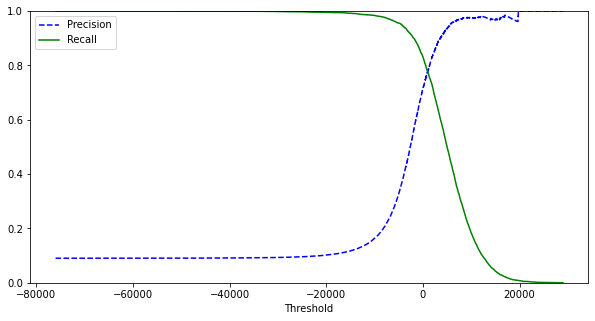

In [ ]:
# CODE HERE
plt.figure(figsize=(10,5)) 



#### lets aim for 90%recall 
#### try different threshold and see what will happen

#### precision score

In [ ]:
# CODE HERE


0.32735085945399395

#### recall score

In [ ]:
#CODE HERE


0.955543257701531

# The ROC Curve

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

#### plot the FPR against the TPR using Matplotlib

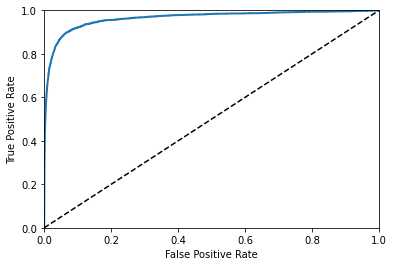

In [ ]:
# CODE HERE


#### computing the ROC AUC score

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9642300087518364

# RandomForest Classifier
#### train a RandomForestClassifier and compare its ROC curve and ROC AUC score to the SGDClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# CODE HERE


#### try to plot ROC 
***Notice that you will need scores not probabilities***

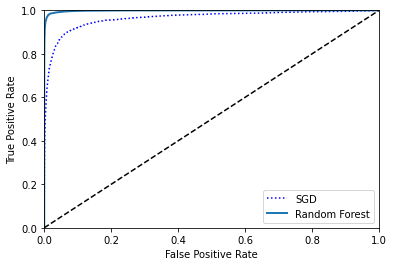

In [ ]:
# CODE HERE
# if you got suck use GOOGLE


#### find ROC AUC score for randomforestclassifier

In [ ]:
# CODE HERE 


0.9984712735923079


# Congrats you did it 🥳 !
# #shAI_Club